In [1]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

In [3]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

In [4]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └┬─┬┘ ║ └╥┘
q_2: ─┤M├──╫──╫─
      └╥┘  ║  ║ 
c: 3/══╩═══╩══╩═
       2   0  1

In [5]:
# Returns 3 in binary (011)

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

In [10]:
# Returns 6 in binary (101)

from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator

qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])

qc.x([0,2])  # Perform X-gates on qubits 0, 1, and 2
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

┌─┐┌───┐           ┌─┐   
q_0: ┤M├┤ X ├───────────┤M├───
     └╥┘└┬─┬┘        ┌─┐└╥┘   
q_1: ─╫──┤M├─────────┤M├─╫────
      ║  └╥┘ ┌─┐┌───┐└╥┘ ║ ┌─┐
q_2: ─╫───╫──┤M├┤ X ├─╫──╫─┤M├
      ║   ║  └╥┘└───┘ ║  ║ └╥┘
c: 3/═╩═══╩═══╩═══════╩══╩══╩═
      0   1   2       1  0  2

In [11]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'101': 1024}

In [15]:
# Returns 4 in binary (011)

from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator

qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])

qc.x([0,1])  # Perform X-gates on qubits 0, 1, and 2
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

┌─┐┌───┐        ┌─┐   
q_0: ┤M├┤ X ├────────┤M├───
     └╥┘└┬─┬┘┌───┐   └╥┘┌─┐
q_1: ─╫──┤M├─┤ X ├────╫─┤M├
      ║  └╥┘ └┬─┬┘┌─┐ ║ └╥┘
q_2: ─╫───╫───┤M├─┤M├─╫──╫─
      ║   ║   └╥┘ └╥┘ ║  ║ 
c: 3/═╩═══╩════╩═══╩══╩══╩═
      0   1    2   2  0  1

In [16]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

In [17]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Result:  {'11': 1024}


In [18]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4,2)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)

In [19]:
from qiskit import QuantumCircuit

test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [2]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [5]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [6]:
qc.x(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [7]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],\n            dims=(2, 2))'

In [8]:
# Let's create a fresh quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [9]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [10]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],\n            dims=(2, 2))'

In [11]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],\n            dims=(2, 2))'

In [12]:
qc.z(0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],\n            dims=(2, 2))'

In [13]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],\n            dims=(2, 2))'

In [14]:
# The message
MESSAGE = '00'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

In [15]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

In [16]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [17]:
qc_bob = QuantumCircuit(2,2)
# Bob unentangles
qc_bob.cx(0,1)
qc_bob.h(0)
# Then measures
qc_bob.measure([0,1],[0,1])

In [18]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [19]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [20]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

In [21]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

In [22]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

In [23]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

In [24]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [25]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

In [26]:
qc = QuantumCircuit(1,1)

qc.draw()

q: 
     
c: 1/

In [27]:
print('Results from z measurement:',
      backend.run(qc.compose(meas_z)).result().get_counts())

Results from z measurement: {'0': 1024}


In [28]:
print('Results from x measurement:',
      backend.run(qc.compose(meas_x)).result().get_counts())

Results from x measurement: {'0': 493, '1': 531}


In [29]:
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

In [30]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'0': 506, '1': 518}


In [31]:
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

In [32]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 518, '0': 506}
Results from x measurement: {'0': 1024}


In [33]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

In [34]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 127, '0': 897}
Results from x measurement: {'0': 156, '1': 868}


In [35]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 167, '0': 857}
Results from x measurement: {'0': 131, '1': 893}


In [36]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

┌───┐┌───────────┐┌───┐┌───────────┐
q_0: ─────────────┤ X ├┤ Ry(0.785) ├┤ X ├┤ Ry(2.356) ├
     ┌───────────┐└─┬─┘└───────────┘└─┬─┘└───────────┘
q_1: ┤ Ry(1.911) ├──■─────────────────■───────────────
     └───────────┘                                    
c: 2/═════════════════════════════════════════════════

In [37]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])

Results for z measurements:


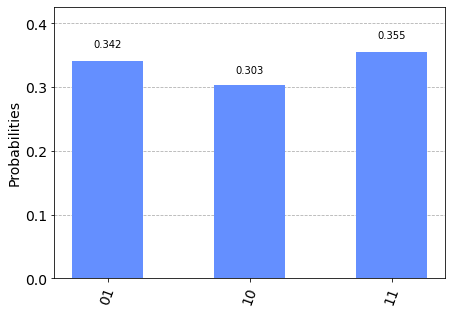

In [38]:
from qiskit.visualization import plot_histogram

print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

Results for a z and an x measurement:


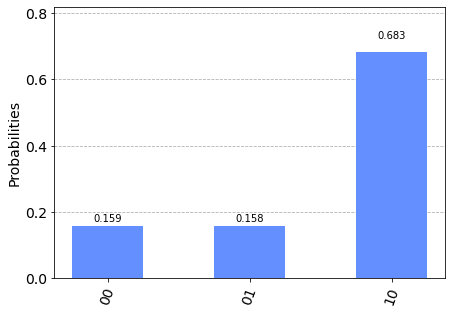

In [39]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

Results for an x and a z measurement:


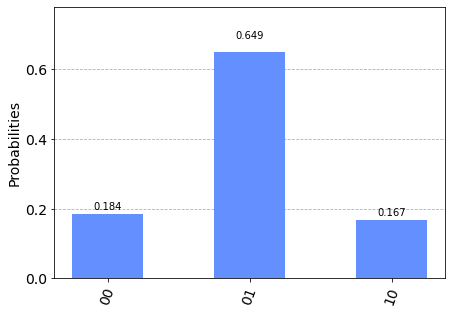

In [40]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])

print('Results for an x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)


Results for an x and an x measurement:


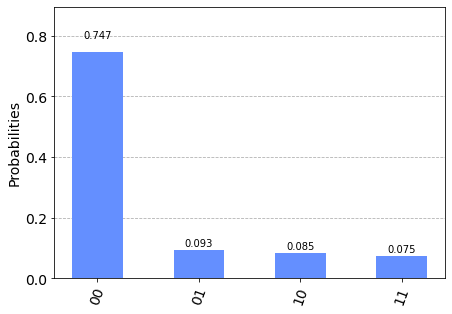

In [41]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])

print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

In [1]:
from hello_qiskit import run_puzzle

ModuleNotFoundError: No module named 'hello_qiskit'

In [1]:
import random
def setup_variables():
    
    ### Replace this section with anything you want ###
    
    r = random.random()
    
    A = r*(2/3)
    B = r*(1/3)
    
    ### End of section ###
    
    return A, B

In [2]:
def hash2bit(variable, hash_type):
    
    ### Replace this section with anything you want ###
    
    if hash_type == 'V':
        bit = (variable < 0.5)
    elif hash_type == 'H':
        bit = (variable < 0.25)
        
    bit = str(int(bit)) # Turn True or False into '1' and '0'
    
    ### End of section ###
        
    return bit

In [3]:
shots = 8192
def calculate_P():
    P = {}
    for hashes in ['VV','VH','HV','HH']:
        
        # calculate each P[hashes] by sampling over `shots` samples
        P[hashes] = 0
        for shot in range(shots):

            A, B = setup_variables()

            # hash type for variable `A` is the 1st character of `hashes`
            a = hash2bit(A, hashes[0])
            # hash type for variable `B` is the 2nd character of `hashes`
            b = hash2bit(B, hashes[1])

            P[hashes] += (a != b)/shots
 
    return P

In [4]:
P = calculate_P()
print(P)

{'VV': 0.2481689453125, 'VH': 0.0, 'HV': 0.6229248046875, 'HH': 0.370849609375}


In [5]:
def bell_test(P):
    sum_P = sum(P.values())
    for hashes in P:
        
        bound = sum_P - P[hashes]
        
        print("The upper bound for P['"+hashes+"'] is "+str(bound))
        print("The value of P['"+hashes+"'] is "+str(P[hashes]))
        if P[hashes]<=bound:
            print("The upper bound is obeyed :)\n")
        else:
            if P[hashes]-bound < 0.1:
                print("This seems to have gone over the upper bound, "
                      "but only by a little bit :S\nProbably just rounding"
                      " errors or statistical noise.\n")
            else:
                print("This has gone well over the upper bound :O !!!!!\n")

In [7]:
bell_test(P)

The upper bound for P['VV'] is 0.9937744140625
The value of P['VV'] is 0.2481689453125
The upper bound is obeyed :)

The upper bound for P['VH'] is 1.241943359375
The value of P['VH'] is 0.0
The upper bound is obeyed :)

The upper bound for P['HV'] is 0.6190185546875
The value of P['HV'] is 0.6229248046875
This seems to have gone over the upper bound, but only by a little bit :S
Probably just rounding errors or statistical noise.

The upper bound for P['HH'] is 0.87109375
The value of P['HH'] is 0.370849609375
The upper bound is obeyed :)



In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def initialize_program():
    qubit = QuantumRegister(2)
    A = qubit[0]
    B = qubit[1]
    
    bit = ClassicalRegister(2)
    a = bit[0]
    b = bit[1]
    
    qc = QuantumCircuit(qubit, bit)
    
    return A, B, a, b, qc

In [9]:
def hash2bit(variable, hash_type, bit, qc):
    if hash_type == 'H':
        qc.h(variable)
    qc.measure(variable, bit)

In [10]:
puzzle = run_puzzle(12)

NameError: name 'run_puzzle' is not defined

In [1]:
# Implementation of Grover's Algorithm

from qiskit import QuantumCircuit
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [2]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

In [3]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [4]:
diffuser.x([0,1])
diffuser.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤├───┤
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [5]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘└───┘   └───┘└───┘

In [6]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [7]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}